In [3]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the Excel file
file = 'posts100_tagged_with_GPT4.xlsx'
sheets = pd.read_excel(file, sheet_name=None)  # Load all sheets

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Process each sheet
for sheet_name, df in sheets.items():
    # Calculate sentiment scores for each post and add them as new columns
    df['neg'] = df['Post'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
    df['neu'] = df['Post'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
    df['pos'] = df['Post'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
    df['compound'] = df['Post'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
    
    # Write back to the Excel file on separate sheets
    with pd.ExcelWriter('posts100_tagged_with_GPT4_sentiment_analysis.xlsx', mode='w') as writer:
        for name, sheet in sheets.items():
            sheet.to_excel(writer, sheet_name=name, index=False)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
# Define a function to encode the answers
import pandas as pd

def encode_answers(answer):
    answer = answer.lower()
    if answer in ['rather not hard to create', 'rather productive']:
        return 1
    elif answer in ['rather hard to create', 'rather not productive']:
        return -1
    elif answer in ['rather neutral to creation', 'rather neutral']:
        return 0
    elif answer == 'author asks for a relative or close friend only':
        return None  # or some other encoding that makes sense for your analysis
file = 'posts100_tagged_with_GPT4.xlsx'
sheets = pd.read_excel(file, sheet_name=None)  # Load all sheets
# Process each sheet
for sheet_name, df in sheets.items():
    # Assume df['answer1'] and df['answer2'] are columns with the answers
    df['encoded_answer1'] = df['GPT Grade1'].apply(encode_answers)
    df['encoded_answer2'] = df['GPT Grade2'].apply(encode_answers)
    df['compound'] = df['Post'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

    # Calculate correlation and use Spearman because it's non-parametric and doesn't assume normality
    correlation_answer1 = df['compound'].corr(df['encoded_answer1'], method='spearman')
    correlation_answer2 = df['compound'].corr(df['encoded_answer2'], method='spearman')

    print(f"Spearman correlation between compound and answer1: {correlation_answer1} in {sheet_name}")
    print(f"Spearman correlation between compound and answer2: {correlation_answer2} in {sheet_name}")


Spearman correlation between compound and answer1: 0.11801625995271506 in sport and art users posts
Spearman correlation between compound and answer2: 0.06817226973549431 in sport and art users posts
Spearman correlation between compound and answer1: 0.19504697292297227 in only art users posts
Spearman correlation between compound and answer2: 0.11420540997741659 in only art users posts


In [11]:
import pandas as pd


# Encode answers as previously defined
def encode_answers(answer):
    answer = answer.lower()
    if answer in ['rather not hard to create', 'rather productive']:
        return 1
    elif answer in ['rather hard to create', 'rather not productive']:
        return -1
    elif answer in ['rather neutral to creation', 'rather neutral']:
        return 0
    elif answer == 'author asks for a relative or close friend only':
        return None

# Define a function to classify compound based on defined thresholds
def classify_compound(compound):
    if compound is None:
        return None
    elif compound > 0.3:
        return 1
    elif compound < -0.3:
        return -1
    else:
        return 0
file = 'posts100_tagged_with_GPT4.xlsx'
sheets = pd.read_excel(file, sheet_name=None)  # Load all sheets
# Process each sheet
for sheet_name, df in sheets.items():
    df['encoded_answer1'] = df['GPT Grade1'].apply(encode_answers)
    df['encoded_answer2'] = df['GPT Grade2'].apply(encode_answers)
    df['compound'] = df['Post'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

    # Classify compound scores
    df['classified_compound'] = df['compound'].apply(classify_compound)

    # Calculate accuracy
    df_dropna = df.dropna(subset=['classified_compound', 'encoded_answer1'])
    matches = df_dropna['classified_compound'] == df_dropna['encoded_answer1']
    accuracy = matches.sum() / len(df_dropna) * 100
    print(f"Percentage accuracy of matches 1: {accuracy:.2f}% in {sheet_name}")

    df_dropna = df.dropna(subset=['classified_compound', 'encoded_answer2'])
    matches = df_dropna['classified_compound'] == df_dropna['encoded_answer2']
    accuracy = matches.sum() / len(df_dropna) * 100
    print(f"Percentage accuracy of matches 2: {accuracy:.2f}% in {sheet_name}")


Percentage accuracy of matches 1: 52.00% in sport and art users posts
Percentage accuracy of matches 2: 36.00% in sport and art users posts
Percentage accuracy of matches 1: 68.00% in only art users posts
Percentage accuracy of matches 2: 28.00% in only art users posts


### Sentiment Analysis of Text Posts Using VADER and Visualization with Histograms

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sheet: sport and art users posts


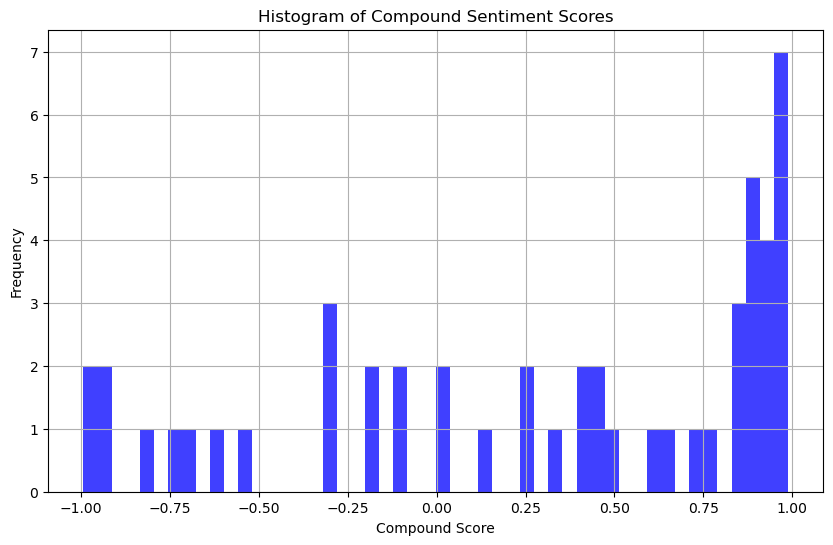

Sheet: only art users posts


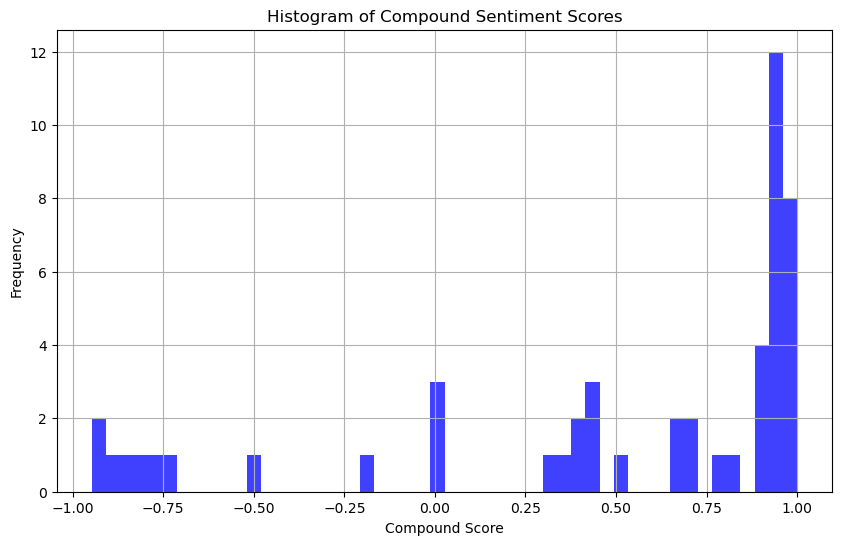

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Ensure NLTK VADER lexicon is available
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Load your data
sheets = pd.read_excel('posts100_tagged_with_GPT4.xlsx', sheet_name=None)  # Replace with your actual file path
# Process each sheet
for sheet_name, df in sheets.items():
    # Compute compound sentiment scores
    df['compound'] = df['Post'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
    print(f"Sheet: {sheet_name}")
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df['compound'], bins=50, alpha=0.75, color='blue')
    plt.title('Histogram of Compound Sentiment Scores')
    plt.xlabel('Compound Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
